In [16]:
# from utils import preprocess, train_test_split_data
from importlib import reload
import os
import utils
from pathlib import Path
import matplotlib.pyplot as plt
from collections import defaultdict
utils = reload(utils)

## Task 1: Data preparation

In [4]:
# sentencepiece package look for sentence hence linebreak needs to be preserved

with open('data/alice_in_wonderland.txt') as f:
    text = f.read()
    prepro_text = utils.preprocess(text) #1.1 preprocessing text
    train, test = utils.train_test_split_data(prepro_text, test_size=0.2) #1.2 split the data

os.makedirs('eng_text/', exist_ok=True)

In [5]:
# saving the splitted corpus
with open('eng_text/train_eng.txt', 'w') as f:
    # f.write(str(train))
    f.write('\n'.join(train))

with open('eng_text/test_eng.txt', 'w') as f:
    # f.write(str(test)) 
    f.write('\n'.join(test))

## Task 2: Subword Segmentation

### 1. Granularity: characters

In [15]:
# training model

# total 72 different types of characters

os.makedirs('models/sentencepiece/', exist_ok=True)

n_ch = 72

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/train_eng.txt' \
  --model_prefix=en_s1_train \
  --vocab_size=$n_ch \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/train_eng.txt
  input_format: 
  model_prefix: en_s1_train
  model_type: BPE
  vocab_size: 72
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  

In [16]:
# segment the text (original)
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s1_train.model \
  --output_format=piece \
  < '../../eng_text/train_eng.txt' \
  > '../../eng_text/en_s1_train.txt'

In [17]:
# training model - test set

## CHANGE PATH TO SHIFT .model & .vocab in models/sentencepiece

# total 72 different types of characters
# coverage changes for non-english


!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/test_eng.txt' \
  --model_prefix=en_s1_test \
  --vocab_size=$n_ch \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/test_eng.txt
  input_format: 
  model_prefix: en_s1_test
  model_type: BPE
  vocab_size: 72
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  es

In [18]:
# segment the text (original) - test set

!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s1_test.model \
  --output_format=piece \
  < '../../eng_text/test_eng.txt' \
  > '../../eng_text/en_s1_test.txt'

### 2. Granularity: subword units (smaller vocabulary)

In [19]:
# training model

# coverage changes for non-english
# fine-tune vocab_size in range of 100-800 for best performance

small_vocab = 650

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/train_eng.txt' \
  --model_prefix=en_s2_train \
  --vocab_size=$small_vocab \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/train_eng.txt
  input_format: 
  model_prefix: en_s2_train
  model_type: BPE
  vocab_size: 650
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
 

In [20]:
# segment the text (original) -train
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s2_train.model \
  --output_format=piece \
  < '../../eng_text/train_eng.txt' \
  > '../../eng_text/en_s2_train.txt'

In [21]:
# training model - test set

# coverage changes for non-english
# fine-tune vocab_size in range of 100-800 for best performance

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/test_eng.txt' \
  --model_prefix=en_s2_test \
  --vocab_size=$small_vocab \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/test_eng.txt
  input_format: 
  model_prefix: en_s2_test
  model_type: BPE
  vocab_size: 650
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  e

In [22]:
# segment the text (original)
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s2_test.model \
  --output_format=piece \
  < '../../eng_text/test_eng.txt' \
  > '../../eng_text/en_s2_test.txt'

### 3. Granularity: subword units (larger vocabulary)

In [23]:
# training model

# coverage changes for non-english
# fine-tune vocab_size in range of 1500-3000 for best performance
# training model

# coverage changes for non-english
# fine-tune vocab_size in range of 100-800 for best performance

large_vocab = 1600

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/train_eng.txt' \
  --model_prefix=en_s3_train \
  --vocab_size=$large_vocab \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/train_eng.txt
  input_format: 
  model_prefix: en_s3_train
  model_type: BPE
  vocab_size: 1600
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1


In [24]:
# segment the text (original)
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s3_train.model \
  --output_format=piece \
  < '../../eng_text/train_eng.txt' \
  > '../../eng_text/en_s3_train.txt'

In [25]:
# training model - test set

# fine-tune vocab_size in range of 1500-3000 for best performance
# training model

# fine-tune vocab_size in range of 100-800 for best performance

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/test_eng.txt' \
  --model_prefix=en_s3_test \
  --vocab_size=$large_vocab \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/test_eng.txt
  input_format: 
  model_prefix: en_s3_test
  model_type: BPE
  vocab_size: 1600
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  

In [26]:
# segment the text (original)
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s3_test.model \
  --output_format=piece \
  < '../../eng_text/test_eng.txt' \
  > '../../eng_text/en_s3_test.txt'

## Observation
* Character - Almost every single character is segmented
* Subword unit (smaller vacob) - The length of segmented subword is longer and many words are also considered as subwords
* Subword unit (larger vocab) - Here, subwords are longer. Many words are themself segmented into single subwords. It can also be seen consistently that orignally longer words are broken into two or more segments.  


## Task 3: LM Training

## 3.1 Baseline training

### 1. Baseline (en_s1 - character level)

In [27]:
# Training baseline LM (en_s1)

os.makedirs('models/rnnlm', exist_ok=True)

!cd models/rnnlm \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s1_train.txt' \
    -valid '../../eng_text/en_s1_test.txt' \
    -rnnlm baseline_en_s1 \
      -hidden 40 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class $n_ch

debug mode: 2
train file: ../../eng_text/en_s1_train.txt
valid file: ../../eng_text/en_s1_test.txt
class size: 72
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: baseline_en_s1
Starting training using file ../../eng_text/en_s1_train.txt
Vocab size: 70
Words in train file: 115760
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.1281    Words/sec: 115481.0   VALID entropy: 3.4054
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.6953    Words/sec: 118598.6   VALID entropy: 3.3093
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.5930    Words/sec: 121798.4   VALID entropy: 3.3068
Iter:   3	Alpha: 0.050000	   TRAIN entropy: 2.4821    Words/sec: 119503.4   VALID entropy: 3.2160
Iter:   4	Alpha: 0.025000	   TRAIN entropy: 2.4283    Words/sec: 119553.8   VALID entropy: 3.1463
Iter:   5	Alpha: 0.012500	   TRAIN entropy: 2.4027    Words/sec: 132355.3   VALID entropy: 3.0978
Iter:   6	Alpha: 0.006250	   TRAIN entropy: 2.3894    Words/sec: 130131.4   VALID entropy: 3.0674
Iter:   7	Alpha: 0.003125	 

### 2. Baseline (smaller vocab - en_s2)
 

In [28]:
!cd models/rnnlm/ \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s2_train.txt' \
    -valid '../../eng_text/en_s2_test.txt' \
    -rnnlm baseline_en_s2 \
      -hidden 40 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class $small_vocab

debug mode: 2
train file: ../../eng_text/en_s2_train.txt
valid file: ../../eng_text/en_s2_test.txt
class size: 650
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: baseline_en_s2
Starting training using file ../../eng_text/en_s2_train.txt
Vocab size: 637
Words in train file: 42128
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.8317    Words/sec: 21301.4   VALID entropy: 7.3359
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.1504    Words/sec: 22547.1   VALID entropy: 6.9131
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.6105    Words/sec: 22011.5   VALID entropy: 6.6717
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.2060    Words/sec: 17491.6   VALID entropy: 6.5249
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.8912    Words/sec: 20937.5   VALID entropy: 6.4526
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.6396    Words/sec: 20873.5   VALID entropy: 6.4218
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 5.4383    Words/sec: 19559.5   VALID entropy: 6.4033
Iter:   7	Alpha: 0.050000	   TRAI

### 3. Baseline (larger vocab - en_s3)

In [29]:
!cd models/rnnlm/ \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s3_train.txt' \
    -valid '../../eng_text/en_s3_test.txt' \
    -rnnlm baseline_en_s3 \
      -hidden 40 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class $large_vocab

debug mode: 2
train file: ../../eng_text/en_s3_train.txt
valid file: ../../eng_text/en_s3_test.txt
class size: 1600
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: baseline_en_s3
Starting training using file ../../eng_text/en_s3_train.txt
Vocab size: 1492
Words in train file: 34066
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.2371    Words/sec: 8899.9   VALID entropy: 7.3408
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.5742    Words/sec: 9085.3   VALID entropy: 6.9567
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.1626    Words/sec: 9045.5   VALID entropy: 6.7428
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.8646    Words/sec: 9073.9   VALID entropy: 6.6075
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.6262    Words/sec: 9134.0   VALID entropy: 6.5198
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.4276    Words/sec: 9174.5   VALID entropy: 6.4496
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.2592    Words/sec: 9095.6   VALID entropy: 6.4485
Iter:   7	Alpha: 0.050000	   TRAIN ent

In [30]:
# printing baseline results
print("****** Baseline: Character level *******")
!tail -3 models/rnnlm/baseline_en_s1.output.txt

print("****** Baseline: smaller subword vocab *******")
!tail -3 models/rnnlm/baseline_en_s2.output.txt

print("****** Baseline: larger subword vocab *******")
!tail -3 models/rnnlm/baseline_en_s3.output.txt


****** Baseline: Character level *******
iter: 8
valid log probability: -23001.242230
PPL net: 8.256309
****** Baseline: smaller subword vocab *******
iter: 11
valid log probability: -16764.411903
PPL net: 68.993461
****** Baseline: larger subword vocab *******
iter: 11
valid log probability: -12809.556787
PPL net: 71.323803


## 3.2 Custom hparam training

### 1. Custom hparam training (character level)

In [31]:
# Training baseline LM (en_s1)
!cd models/rnnlm \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s1_train.txt' \
    -valid '../../eng_text/en_s1_test.txt' \
    -rnnlm en_s1 \
      -hidden 70 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 5 \
      -class $n_ch

debug mode: 2
train file: ../../eng_text/en_s1_train.txt
valid file: ../../eng_text/en_s1_test.txt
class size: 72
Hidden layer size: 70
BPTT: 5
Rand seed: 1
rnnlm file: en_s1
Starting training using file ../../eng_text/en_s1_train.txt
Vocab size: 70
Words in train file: 115760
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.1144    Words/sec: 51252.9   VALID entropy: 3.3655
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.6143    Words/sec: 54333.4   VALID entropy: 3.2469
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.4622    Words/sec: 51365.6   VALID entropy: 3.2018
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.3755    Words/sec: 43091.5   VALID entropy: 3.1991
Iter:   4	Alpha: 0.050000	   TRAIN entropy: 2.2564    Words/sec: 56639.6   VALID entropy: 3.0576
Iter:   5	Alpha: 0.025000	   TRAIN entropy: 2.1936    Words/sec: 49818.3   VALID entropy: 2.9791
Iter:   6	Alpha: 0.012500	   TRAIN entropy: 2.1612    Words/sec: 48321.9   VALID entropy: 2.9323
Iter:   7	Alpha: 0.006250	   TRAIN entropy:

### 2. Custom hparam training (smaller vocab - en_s2)

In [32]:
# Training LM on subword units (smaller vocab - en_s2)

# incr hidden -> better pp
# if class < vocabsize -> worse pp
# incr class -> better pp

!cd models/rnnlm/ \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s2_train.txt' \
    -valid '../../eng_text/en_s2_test.txt' \
    -rnnlm en_s2 \
      -hidden 100 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 6 \
      -class $small_vocab

debug mode: 2
train file: ../../eng_text/en_s2_train.txt
valid file: ../../eng_text/en_s2_test.txt
class size: 650
Hidden layer size: 100
BPTT: 6
Rand seed: 1
rnnlm file: en_s2
Starting training using file ../../eng_text/en_s2_train.txt
Vocab size: 637
Words in train file: 42128
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.8465    Words/sec: 7657.7   VALID entropy: 7.3931
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.1626    Words/sec: 7084.4   VALID entropy: 6.9263
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.6026    Words/sec: 6603.9   VALID entropy: 6.6510
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.1692    Words/sec: 7485.9   VALID entropy: 6.5146
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.8320    Words/sec: 6996.8   VALID entropy: 6.4330
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.5588    Words/sec: 7441.1   VALID entropy: 6.3780
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 5.3286    Words/sec: 7298.4   VALID entropy: 6.3620
Iter:   7	Alpha: 0.050000	   TRAIN entropy: 5.04

### 3. Custom hparam training (larger vocab - en_s3)

In [36]:
# Training LM on subword units (larger vocab - en_s3)

# incr hidden -> better pp
# incr bptt -> worse pp
# if class < vocabsize -> worse pp
# incr class -> better pp

!cd models/rnnlm/ \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s3_train.txt' \
    -valid '../../eng_text/en_s3_test.txt' \
    -rnnlm en_s3 \
      -hidden 140 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 1 \
      -class $large_vocab

debug mode: 2
train file: ../../eng_text/en_s3_train.txt
valid file: ../../eng_text/en_s3_test.txt
class size: 1600
Hidden layer size: 140
BPTT: 1
Rand seed: 1
rnnlm file: en_s3
Starting training using file ../../eng_text/en_s3_train.txt
Vocab size: 1492
Words in train file: 34066
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.2703    Words/sec: 2290.8   VALID entropy: 7.3837
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.5990    Words/sec: 2428.7   VALID entropy: 6.9609
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.1733    Words/sec: 2308.3   VALID entropy: 6.7500
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.8630    Words/sec: 2226.8   VALID entropy: 6.6262
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.6187    Words/sec: 2236.9   VALID entropy: 6.5557
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.4098    Words/sec: 2403.1   VALID entropy: 6.5130
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.2218    Words/sec: 2402.8   VALID entropy: 6.4884
Iter:   7	Alpha: 0.100000	   TRAIN entropy: 6.

In [37]:
# printing final results
print("****** Final: Character level *******")
!tail -3 models/rnnlm/en_s1.output.txt

print("****** Final: smaller subword vocab *******")
!tail -3 models/rnnlm/en_s2.output.txt

print("****** Final: larger subword vocab *******")
!tail -3 models/rnnlm/en_s3.output.txt


****** Final: Character level *******
iter: 9
valid log probability: -21735.808313
PPL net: 7.351029
****** Final: smaller subword vocab *******
iter: 12
valid log probability: -16676.489586
PPL net: 67.478303
****** Final: larger subword vocab *******
iter: 14
valid log probability: -12764.756432
PPL net: 70.267250


## Task 4: Text Generation


### 4.1 
Here, generating text for different values of k and saving them in text files

### Baselines

In [10]:
## 1. Character level granularity
os.makedirs('eng_text/baseline_gen_en_s1/', exist_ok=True)

!cd models/rnnlm/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
            ../../rnnlm/rnnlm \
            -rnnlm  baseline_en_s1\
            -gen $i \
            -debug 0 \
            >> "../../eng_text/baseline_gen_en_s1/${i}.txt"; \
       done

In [3]:
## 2. subword units (smaller vocab - en_s2)

os.makedirs('eng_text/baseline_gen_en_s2/', exist_ok=True)

!cd models/rnnlm \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
            ../../rnnlm/rnnlm \
            -rnnlm baseline_en_s2 \
            -gen $i \
            -debug 0 \
            >> "../../eng_text/baseline_gen_en_s2/${i}.txt"; \
       done

In [4]:
## 3. subword units (larger vocab - en_s3)


os.makedirs('eng_text/baseline_gen_en_s3/', exist_ok=True)

!cd models/rnnlm \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
            ../../rnnlm/rnnlm \
            -rnnlm baseline_en_s3 \
            -gen $i \
            -debug 0 \
            >> "../../eng_text/baseline_gen_en_s3/${i}.txt"; \
       done

### Custom 

In [38]:
## 1. Character level granularity
os.makedirs('eng_text/gen_en_s1/', exist_ok=True)

!cd models/rnnlm/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
            ../../rnnlm/rnnlm \
            -rnnlm  en_s1\
            -gen $i \
            -debug 0 \
            >> "../../eng_text/gen_en_s1/${i}.txt"; \
       done

In [39]:
## 2. subword units (smaller vocab - en_s2)


os.makedirs('eng_text/gen_en_s2/', exist_ok=True)

!cd models/rnnlm \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
            ../../rnnlm/rnnlm \
            -rnnlm en_s2 \
            -gen $i \
            -debug 0 \
            >> "../../eng_text/gen_en_s2/${i}.txt"; \
       done

In [40]:
## 3. subword units (larger vocab - en_s3)


os.makedirs('eng_text/gen_en_s3/', exist_ok=True)

!cd models/rnnlm \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
            ../../rnnlm/rnnlm \
            -rnnlm en_s3 \
            -gen $i \
            -debug 0 \
            >> "../../eng_text/gen_en_s3/${i}.txt"; \
       done

### 4.2 Analysis

In [1]:
# back to original (human readable form) from subword units 

# baseline
!cd models/sentencepiece/ \
  &&spm_decode \
  --model=en_s1_train.model \
  --input_format=piece \
  < "../../eng_text/baseline_gen_en_s1/100.txt" \
  > "../../eng_text/baseline_gen_en_s1/decod.100.txt"

# custom
!cd models/sentencepiece/ \
  &&spm_decode \
  --model=en_s1_train.model \
  --input_format=piece \
  < "../../eng_text/gen_en_s1/100.txt" \
  > "../../eng_text/gen_en_s1/decod.100.txt"

# displaying text
!tail -3 eng_text/gen_en_s1/decod.100.txt

`I danctens tafk now and and the can the Cat--' `Noirned,' coos seecull, of quite.
The Dance going


In [2]:
# back to original (human readable form) from subword units 

# baseline
!cd models/sentencepiece/ \
  &&spm_decode \
  --model=en_s2_train.model \
  --input_format=piece \
  < "../../eng_text/baseline_gen_en_s2/100.txt" \
  > "../../eng_text/baseline_gen_en_s2/decod.100.txt"

# custom
!cd models/sentencepiece/ \
  &&spm_decode \
  --model=en_s2_train.model \
  --input_format=piece \
  < "../../eng_text/gen_en_s2/100.txt" \
  > "../../eng_text/gen_en_s2/decod.100.txt"

# displaying text
!tail -3 eng_text/gen_en_s2/decod.100.txt

The King, in Tine had be the right-teation:--but you's my  like!'
said the Queen, `ifhen it waited about a limationy he more of them, and that's all or very inter.'
`I've answer


In [3]:
# back to original (human readable form) from subword units 

# baseline
!cd models/sentencepiece/ \
  &&spm_decode \
  --model=en_s3_train.model \
  --input_format=piece \
  < "../../eng_text/baseline_gen_en_s3/100.txt" \
  > "../../eng_text/baseline_gen_en_s3/decod.100.txt"

# custom
!cd models/sentencepiece/ \
  &&spm_decode \
  --model=en_s3_train.model \
  --input_format=piece \
  < "../../eng_text/gen_en_s3/100.txt" \
  > "../../eng_text/gen_en_s3/decod.100.txt"

# displaying text
!tail -3 eng_text/gen_en_s3/decod.100.txt

Deethings weucked a procession!'
I suppose it came to the hookah, and she sat her time to exp into a minute; by he had neveruce the thing had to them if it is, for the samehedver heads down back about how.
`I can't matter-- have's a CERE you must be mad, with Alice dos place on, sir in their thrs,


### From inspection of generated text:
* With character level granularity, there is a structure of sentence and many generated words are also real. However, the grammar is very bad and some words doesn't exist in english.
* With small subword granularity, there are more real words. There is style of quotes to indicate they are dialogues. It still lacks grammar and most sentences doesn't make sense or a complete meaning.
* With larger subword vocabulary, more words are real. We can see more dialogues which even indicate they are said by Alice. Overall, more information or richer meaning is delivered here.
* When comparing baseline with custom hparam models, the generate text by baseline have more unreal words which doesn't exit in English language.

In [12]:
# decoding all the generated text files

# baseline
!cd models/sentencepiece/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
        spm_decode \
        --model=en_s1_train.model \
        --input_format=piece \
        < "../../eng_text/baseline_gen_en_s1/${i}.txt" \
        > "../../eng_text/baseline_gen_en_s1/decod.${i}.txt"; \
       done

In [ ]:
# custom
!cd models/sentencepiece/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
        spm_decode \
        --model=en_s1_train.model \
        --input_format=piece \
        < "../../eng_text/gen_en_s1/${i}.txt" \
        > "../../eng_text/gen_en_s1/decod.${i}.txt"; \
       done


In [13]:
!cd models/sentencepiece/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
        spm_decode \
        --model=en_s2_train.model \
        --input_format=piece \
        < "../../eng_text/baseline_gen_en_s2/${i}.txt" \
        > "../../eng_text/baseline_gen_en_s2/decod.${i}.txt"; \
       done

In [ ]:

!cd models/sentencepiece/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
        spm_decode \
        --model=en_s2_train.model \
        --input_format=piece \
        < "../../eng_text/gen_en_s2/${i}.txt" \
        > "../../eng_text/gen_en_s2/decod.${i}.txt"; \
       done


In [14]:
!cd models/sentencepiece/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
        spm_decode \
        --model=en_s3_train.model \
        --input_format=piece \
        < "../../eng_text/baseline_gen_en_s3/${i}.txt" \
        > "../../eng_text/baseline_gen_en_s3/decod.${i}.txt"; \
       done

In [ ]:
!cd models/sentencepiece/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
        spm_decode \
        --model=en_s3_train.model \
        --input_format=piece \
        < "../../eng_text/gen_en_s3/${i}.txt" \
        > "../../eng_text/gen_en_s3/decod.${i}.txt"; \
       done

## Task 5 OOV comparison

In [17]:
# extracting vocabulary
train_vocabs = utils.vocab_generator(Path('eng_text/train_eng.txt').open('r').read())
test_vocabs = utils.vocab_generator(Path('eng_text/test_eng.txt').open('r').read())

### Baseline

In [18]:
# characters
b_extra_vocab_ch = {}
for path in Path('eng_text/baseline_gen_en_s1/').rglob('decod*.txt'):
    k = int(path.name.split(".")[1])
    b_extra_vocab_ch[k] = utils.vocab_generator(Path(path).open('r').read())

In [19]:
# smaller vocab
b_extra_vocab_smV = {}
for path in Path('eng_text/baseline_gen_en_s2/').rglob('decod*.txt'):
    k = int(path.name.split(".")[1])
    b_extra_vocab_smV[k] = utils.vocab_generator(Path(path).open('r').read())

In [20]:
# larger vocab
b_extra_vocab_lrV = {}
for path in Path('eng_text/baseline_gen_en_s3/').rglob('decod*.txt'):
    k = int(path.name.split(".")[1])
    b_extra_vocab_lrV[k] = utils.vocab_generator(Path(path).open('r').read())

### Custom models

In [61]:
# characters
extra_vocab_ch = {}
for path in Path('eng_text/gen_en_s1/').rglob('decod*.txt'):
    k = int(path.name.split(".")[1])
    extra_vocab_ch[k] = utils.vocab_generator(Path(path).open('r').read())

In [62]:
# smaller vocab
extra_vocab_smV = {}
for path in Path('eng_text/gen_en_s2/').rglob('decod*.txt'):
    k = int(path.name.split(".")[1])
    extra_vocab_smV[k] = utils.vocab_generator(Path(path).open('r').read())

In [63]:
# larger vocab
extra_vocab_lrV = {}
for path in Path('eng_text/gen_en_s3/').rglob('decod*.txt'):
    k = int(path.name.split(".")[1])
    extra_vocab_lrV[k] = utils.vocab_generator(Path(path).open('r').read())

### 5.1 Calc OOV rate (original corpus)

In [64]:
oov_rate = utils.oov_calculator(
    train_vocabs,test_vocabs
)
print("OOV rate (original corpus):", oov_rate)


OOV rate (original corpus): 0.10734573947110676


### 5.2 OOV rate calculation with generated corpora (k times)

#### Baseline

In [21]:
# character
oov_ch_b = []
for k in range(1,8):
    oov_rate = utils.oov_calculator(
        train_vocabs + b_extra_vocab_ch[10**k],
        test_vocabs 
        )
    oov_ch_b.append(oov_rate)

print(oov_ch_b)

[0.10734573947110676, 0.10734573947110676, 0.10734573947110676, 0.10577864838393732, 0.10244857982370226, 0.09500489715964741, 0.07541625857002938]


In [22]:
# smaller vocabulary
oov_smV_b = []
for k in range(1,8):
    oov_rate = utils.oov_calculator(
        train_vocabs + b_extra_vocab_smV[10**k],
        test_vocabs 
        )
    oov_smV_b.append(oov_rate)

print(oov_smV_b)

[0.10734573947110676, 0.10734573947110676, 0.1069539666993144, 0.10617042115572968, 0.09735553379040157, 0.08501469147894221, 0.06797257590597454]


In [23]:
# larger vocabulary
oov_lrV_b = []
for k in range(1,8):
    oov_rate = utils.oov_calculator(
        train_vocabs + b_extra_vocab_lrV[10**k],
        test_vocabs 
        )
    oov_lrV_b.append(oov_rate)

print(oov_lrV_b)

[0.10734573947110676, 0.10734573947110676, 0.10714985308521058, 0.10675808031341821, 0.09970617042115573, 0.09167482859941234, 0.07443682664054849]


#### Custom

In [65]:
# character
oov_ch = []
for k in range(1,8):
    oov_rate = utils.oov_calculator(
        train_vocabs + extra_vocab_ch[10**k],
        test_vocabs 
        )
    oov_ch.append(oov_rate)

print(oov_ch)

[0.10734573947110676, 0.10734573947110676, 0.10734573947110676, 0.10714985308521058, 0.1049951028403526, 0.0901077375122429, 0.07482859941234084]


In [66]:
# smaller vocabulary
oov_smV = []
for k in range(1,8):
    oov_rate = utils.oov_calculator(
        train_vocabs + extra_vocab_smV[10**k],
        test_vocabs 
        )
    oov_smV.append(oov_rate)

print(oov_smV)

[0.10734573947110676, 0.10734573947110676, 0.10734573947110676, 0.1059745347698335, 0.09911851126346718, 0.08619000979431929, 0.06679725759059746]


In [67]:
# larger vocabulary
oov_lrV = []
for k in range(1,8):
    oov_rate = utils.oov_calculator(
        train_vocabs + extra_vocab_lrV[10**k],
        test_vocabs 
        )
    oov_lrV.append(oov_rate)

print(oov_lrV)

[0.10734573947110676, 0.10734573947110676, 0.1069539666993144, 0.1059745347698335, 0.098922624877571, 0.08854064642507346, 0.07345739471106758]


### 5.3 Plots

#### Baseline

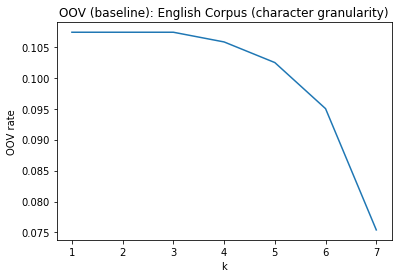

In [24]:
# character 
x = range(1,8)

# plt.bar(x, oov_ch)

plt.plot(x, oov_ch_b)
plt.xlabel('k')
plt.ylabel('OOV rate')
plt.title("OOV (baseline): English Corpus (character granularity)" )
plt.show()


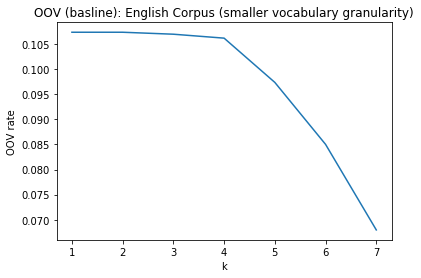

In [25]:
# smaller vocabulary 
x = range(1,8)

plt.plot(x, oov_smV_b)
plt.xlabel('k')
plt.ylabel('OOV rate')
plt.title("OOV (basline): English Corpus (smaller vocabulary granularity)" )
plt.show()


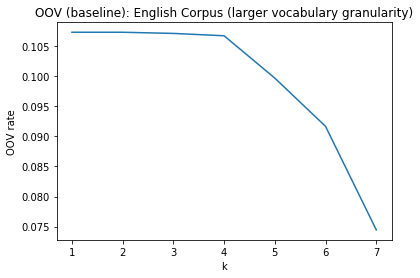

In [26]:
# larger vocabulary 
x = range(1,8)

plt.plot(x, oov_lrV_b)
plt.xlabel('k')
plt.ylabel('OOV rate')
plt.title("OOV (baseline): English Corpus (larger vocabulary granularity)" )
plt.show()


#### Custom models

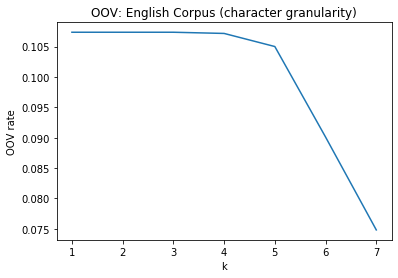

In [68]:
# character 
x = range(1,8)

# plt.bar(x, oov_ch)

plt.plot(x, oov_ch)
plt.xlabel('k')
plt.ylabel('OOV rate')
plt.title("OOV: English Corpus (character granularity)" )
plt.show()


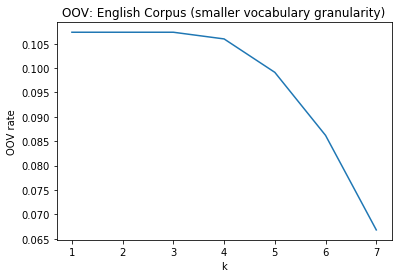

In [69]:
# smaller vocabulary 
x = range(1,8)

plt.plot(x, oov_smV)
plt.xlabel('k')
plt.ylabel('OOV rate')
plt.title("OOV: English Corpus (smaller vocabulary granularity)" )
plt.show()


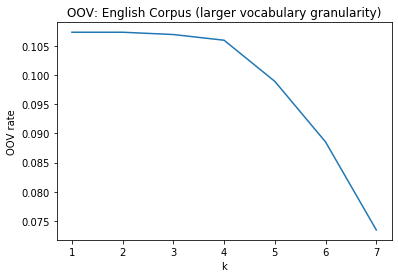

In [70]:
# larger vocabulary 
x = range(1,8)

plt.plot(x, oov_lrV)
plt.xlabel('k')
plt.ylabel('OOV rate')
plt.title("OOV: English Corpus (larger vocabulary granularity)" )
plt.show()


### Observations
For all level of granularity the oov rate decreases as size of generated corpus (10^k) increases. Our custom models performs better in terms of perplexity and OOV rate than baseline. In a practicle application, I would prefer, a model with smaller subword vocabulary. From our experiment, it gets the lowest OOV rate. Also intuitively, character level granularity doesn't make meaningful words and model long term dependencies.The larger vocabulary subwords becomes very close to actual words. The smaller vocabulary subwords fits better to close the generative gap between characters and whole words.

## Report

* details like data split into 80-20 based on sentences
*  a better subword granularity was observed for a particular vocab size as opposed to another.
* report the correlation of perplexity (on the test data) and OOV rate.

With this project, we aim to solve the problem of OOV words using subword representation. By reducing the OOV words the performance of language model will improve. After generating the newer corpora with subword representation and including it in training set, the OOV rate decreases. Thus, we achieve our target of improving the model performance. 

For English language, we started with preparing the data. The original dataset was tokenized into sentences in preprocessing step. Then splited into train and test set with `80%` and `20%` data respectively and store in their respective text file. Each file contain one sentence per line so that sentencepiece library can utilize the text files. All the special characters, quotations and punctuations are kept intact so that LM can learn and generate rich quality text. Next, with sentencepiece subword units were learned at three different granularity levels, i.e., characters, smaller vocabulary and larger vocabulary with `72`, `650` and `1600` size respectively. The trained model then segment the origina text files (train and test set). A common observation is as granularity increases, the length of subwords also increases (more detailed observations are included along the code). The segmented text files were used to train LM using rnnlm library (based on RNN architecture). Two types of models were trained for each granularity level (6 in total). First, baseline with fixed hyperparameters as instructed. Second, custom models with better perplexity (PPL net) as shown in below table.

|Model\ Granularity|	Characters	| Smaller vocabulary 	| Larger vocabulary |
|------------|------|---|---|
|Baseline |	8.256309 |	68.993461|	71.323803|
|Custom	| 7.351029	| 67.478303|	70.26725|

We also showed later that custom models achieve better OOV rate than baseline too. We observed that increase hidden layer and class improves the models. But with higher hidden layers, model training time also increases. The following setting of hyperparameters were used (rand-seed was fixed to 1 and class is equal to the vocabulary size at each granularity):

| Params\Models | Baseline (fixed) | Character | Smaller Vocab | Larger Vocab |
|---------------|------------------|-----------|---------------|--------------|
| hidden        |               40 |        70 |           100 |          140 |
| bptt          |                3 |         5 |             6 |            1 |
| class         | #vocab_size      |        72 |           650 |         1600 |

 
To utilize the subword units learned, we generate texts for all models learned previously by rnnlm. The text generate were of varying size wtih $k = 10^1, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7$ output tokens. Finally, we compare our subword unit method with original corpus, baseline and custom model. The original corpus `OOV rate = 0.1073457395`. Further results are shown below:

|Model\ Granularity|	Characters	| Smaller vocabulary 	| Larger vocabulary |
|------------|------|---|---|
|Baseline	|0.07541625857|	0.06797257591|	0.07443682664|
|Custom	|0.07482859941	|**0.06679725759**	|0.07345739471|

 The oov rate decreases as size of generated corpus (10^k) increases, thus OOV rate is inversely proportional to the size of the corpus. In a practicle application, we would prefer, a model with smaller subword vocabulary. From our experiment, it gets the lowest OOV rate. Also intuitively, character level granularity doesn't make meaningful words and model long term dependencies.The larger vocabulary subwords becomes very close to actual words. The smaller vocabulary subwords fits better to close the generative gap between characters and whole words.

With our experiments the best vocabulary size was selected as 72 (character level - depends on unique characters so fixed), 650 (smaller vocabulary) and 1600 (larger vocabulary) based on following observations (with custom models):
| Class Size |   PPL   | OOV |
|------------|:-------:|-----------|
|     **72** |  7.351029 |  0.07482859941|
|        250 |	38.003512|	0.07169441724|
|        450 |  57.866186|	0.07032321254|
|    **650** |  67.478303|	0.06190009794|
|   **1600** |	70.267250| 0.07580803134|
|       2000 |	61.79642 | 0.07933398629|
|       2500 |	47.102088| 0.07972575906|


* Takeaways
* result difference (done in bengali)
* improvements (done in bengali)